In [15]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (10.0, 10.0)
n = 1000
mu = 3.69
xs_started = [0.14, 0.33, 0.69, 0.88]

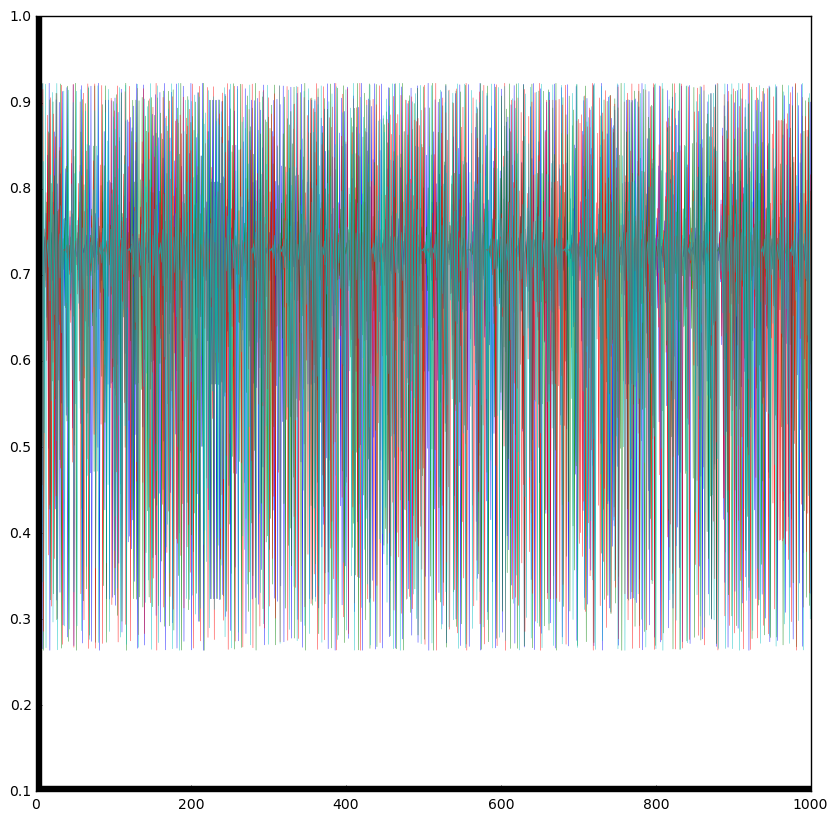

In [16]:
def f(x):
    return mu * x * (1 - x)

def create_a_sequence(x_started):
    sequence = [x_started]
    x_currenturrent = x_started
    for i in range(n):
        x_next_one = f(x_currenturrent)
        sequence.append(x_next_one)
        x_currenturrent = x_next_one
    return sequence

sequences = []
for x_started in xs_started:
    sequences.append(create_a_sequence(x_started))
    
def create_a_plot(x, y, color=None):
    if not color:
        plt.plot(x, y, color="green", linewidth=(0.1))
    else:
        plt.plot(x, y, linewidth=(0.3))
    ax1 = plt.axes()
    ax1.get_xaxis().tick_bottom()
    ax1.get_yaxis().tick_left()
    xmin, xmax = ax1.get_xaxis().get_view_interval()
    ymin, ymax = ax1.get_yaxis().get_view_interval()
    ax1.add_artist(
        plt.Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=8))
    ax1.add_artist(
        plt.Line2D((xmin, xmin), (ymin, ymax), color='black', linewidth=8))
    
for sequence in sequences:
    create_a_plot(range(len(sequence)), sequence, 1)
plt.show()

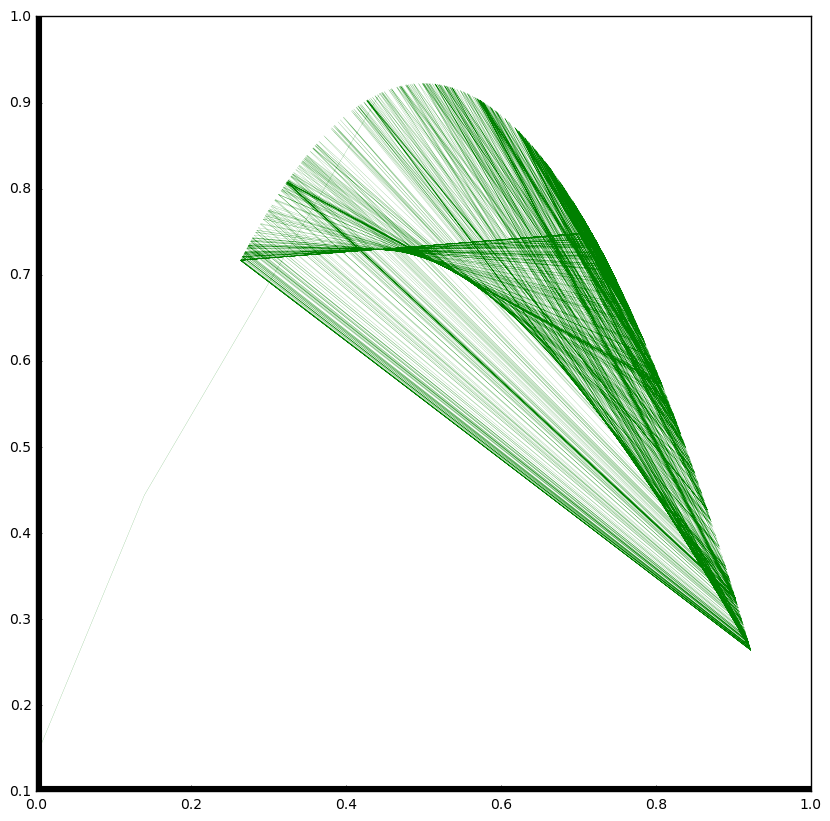

In [17]:
sequence = sequences[0]
sequence_shifted = sequence[:]
sequence_shifted.insert(0, 0)
sequence_shifted.pop(-1)

create_a_plot(sequence_shifted, sequence)
plt.show()

In [18]:
def create_a_xy_our_object(x, y, e):
    x_next_one = f(x) - e * (f(x) - f(y))
    y_next_one = f(y) + e * (f(x) - f(y))
    return x_next_one, y_next_one

def create_a_xy_system(x_started, y_started, e):
    xs = []
    ys = []
    x_current, y_current = x_started, y_started
    for i in range(n):
        x_n, y_n = create_a_xy_our_object(x_current, y_current, e)
        xs.append(x_n)
        ys.append(y_n)
        x_current = x_n
        y_current = y_n
    return xs, ys

def create_a_transition_from(xs, ys):
    us = []
    vs = []
    for x, y in zip(xs, ys):
        u = (x + y) / 2
        v = (x - y) / 2
        us.append(u)
        vs.append(v)
    return us, vs

In [19]:
es = [i for i in np.arange(0.03, 0.49, 0.05)]
x_started, y_started = xs_started[0], xs_started[1]

xy_sequences = []
for e in es:
    our_object = (create_a_xy_system(x_started, y_started, e), e)
    xy_sequences.append(our_object) 
    
uv_sequences = []
for sequence in xy_sequences:
    uv_sequences.append((create_a_transition_from(*sequence[0]), sequence[1]))

## ln|v_n|(n)

E value is 0.03


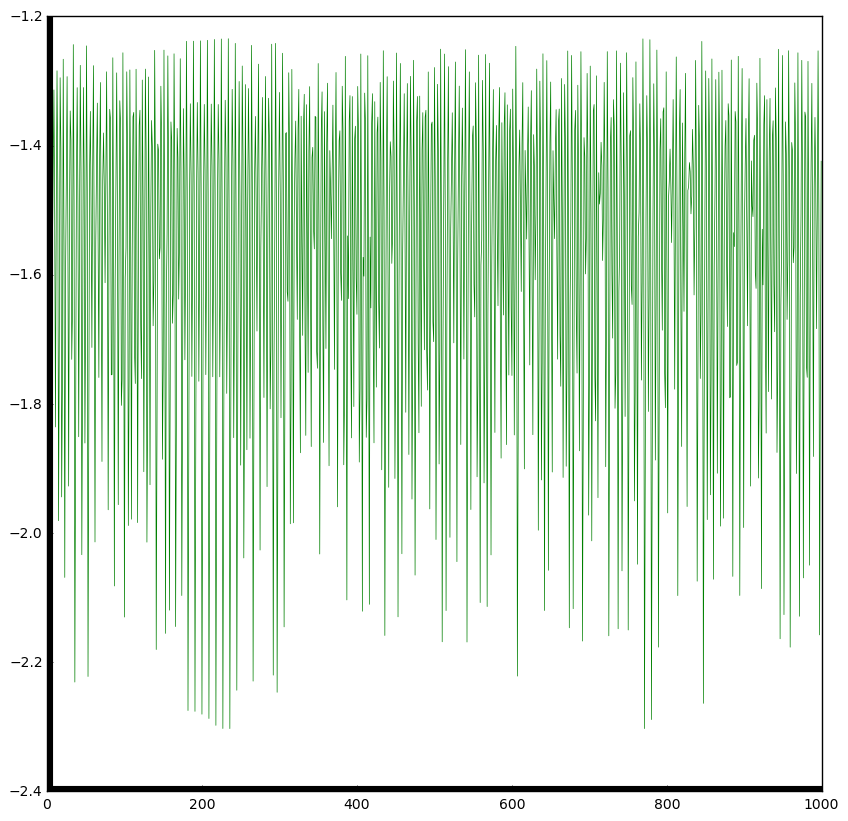

E value is 0.08


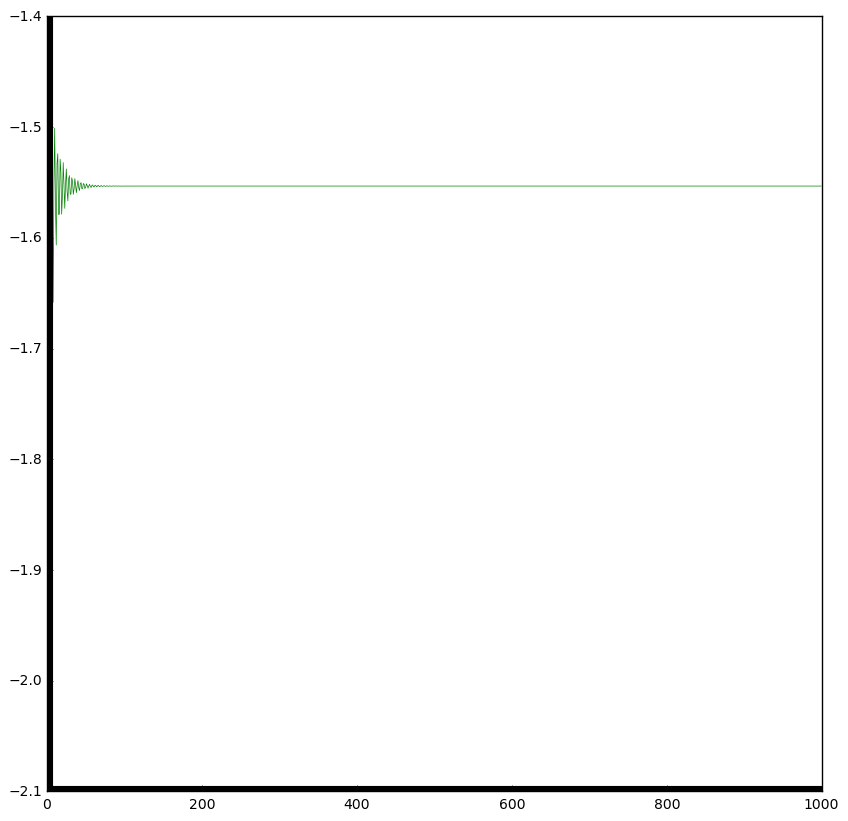

E value is 0.13


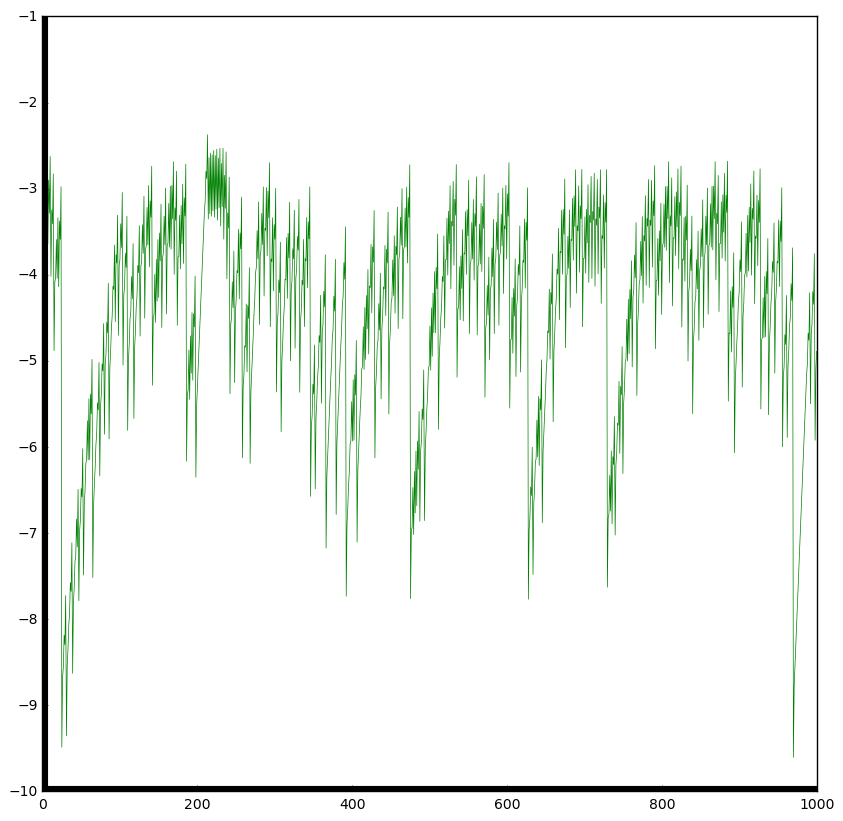

E value is 0.18


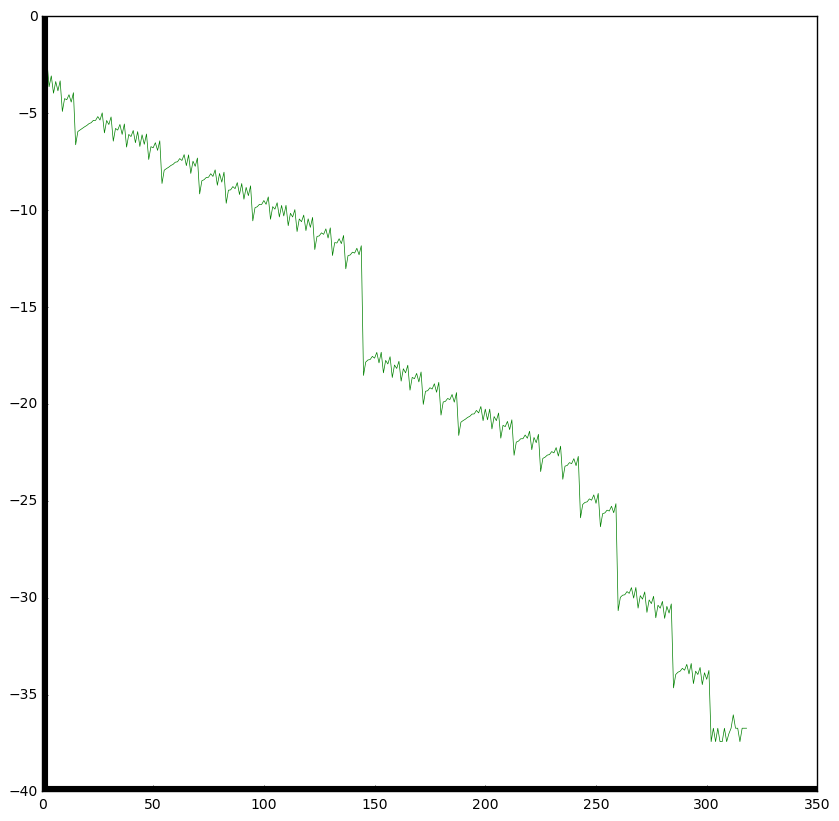

E value is 0.23


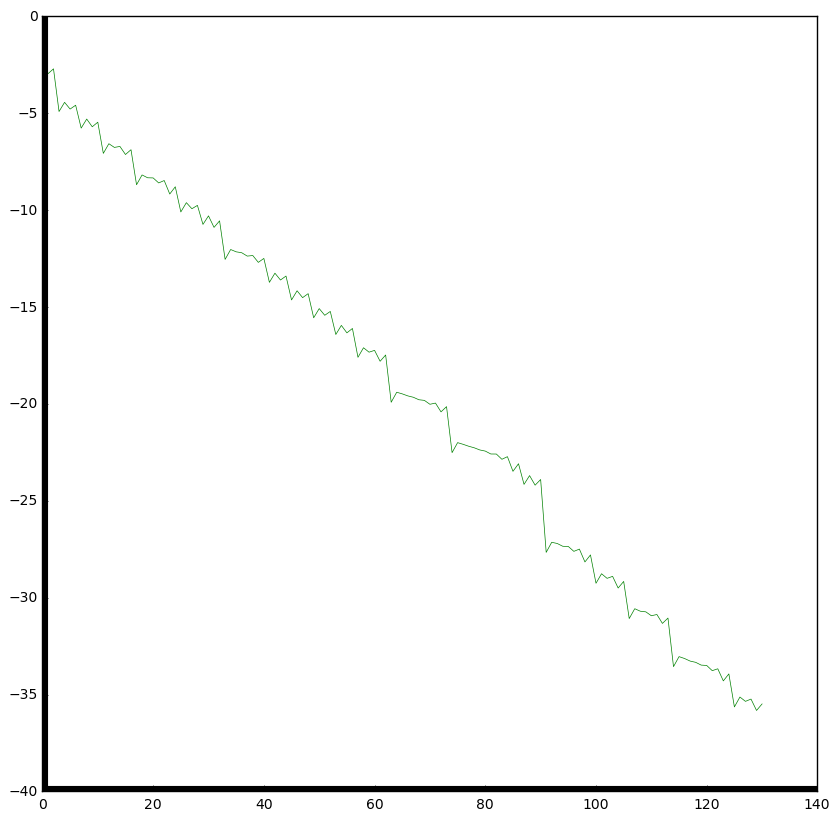

E value is 0.28


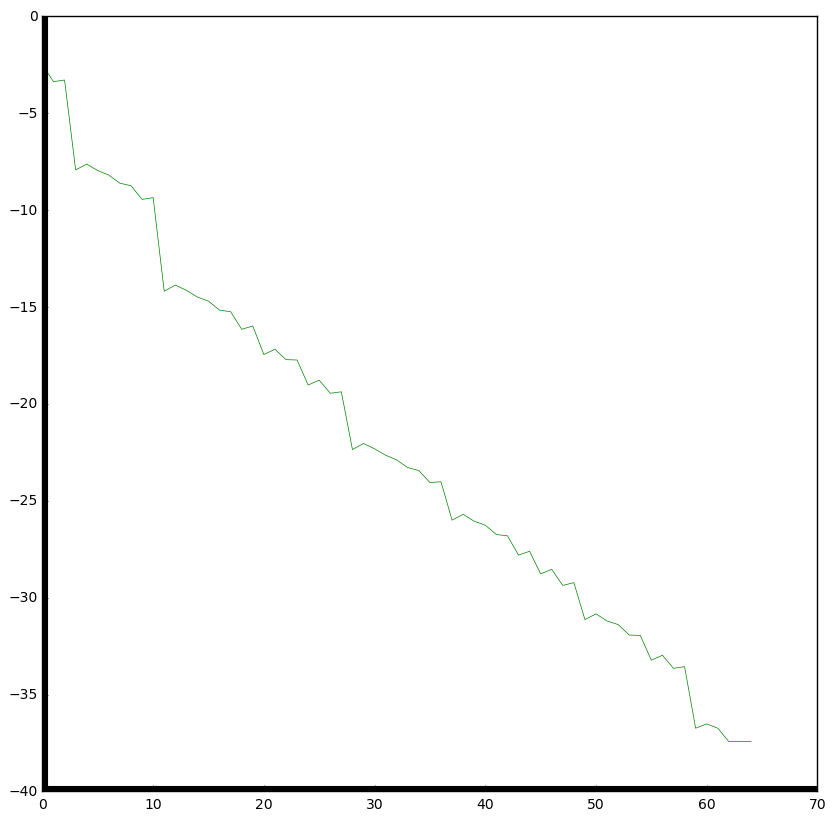

E value is 0.33


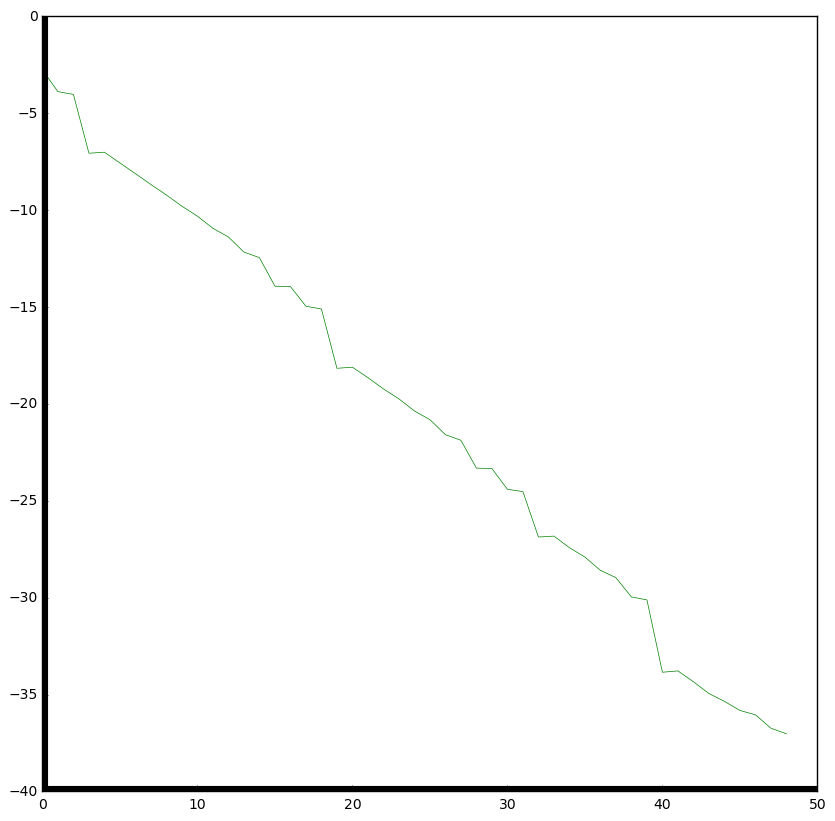

E value is 0.38


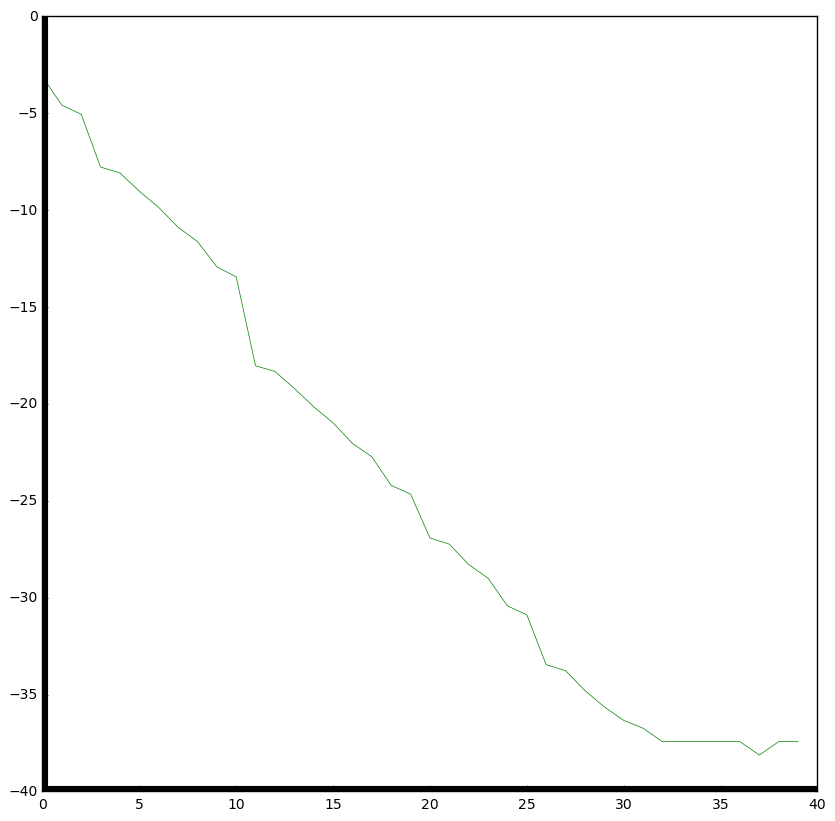

E value is 0.43


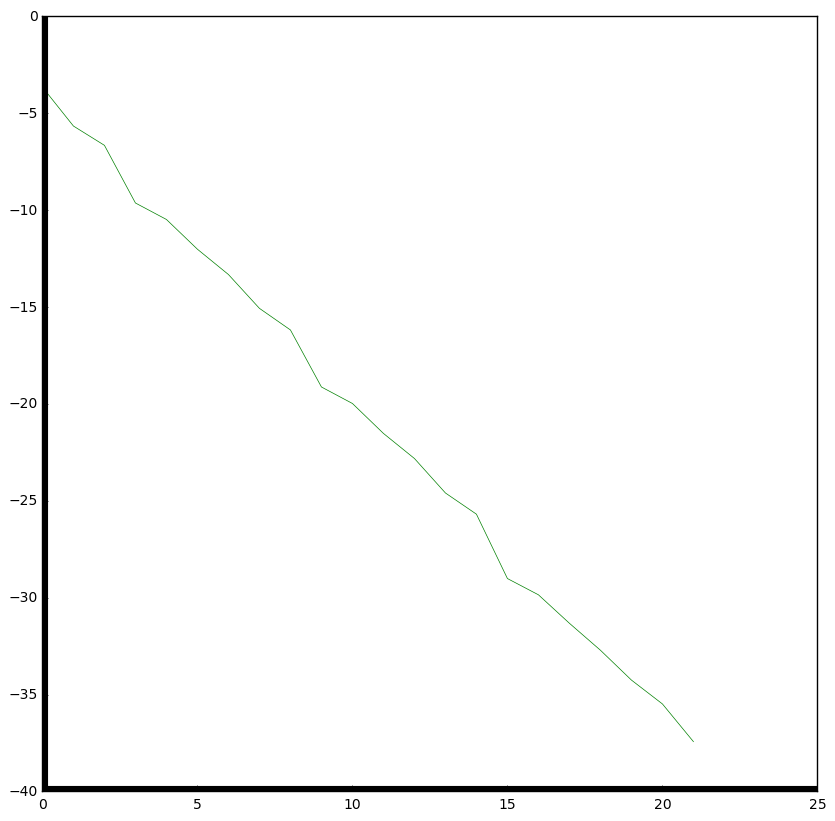

E value is 0.48


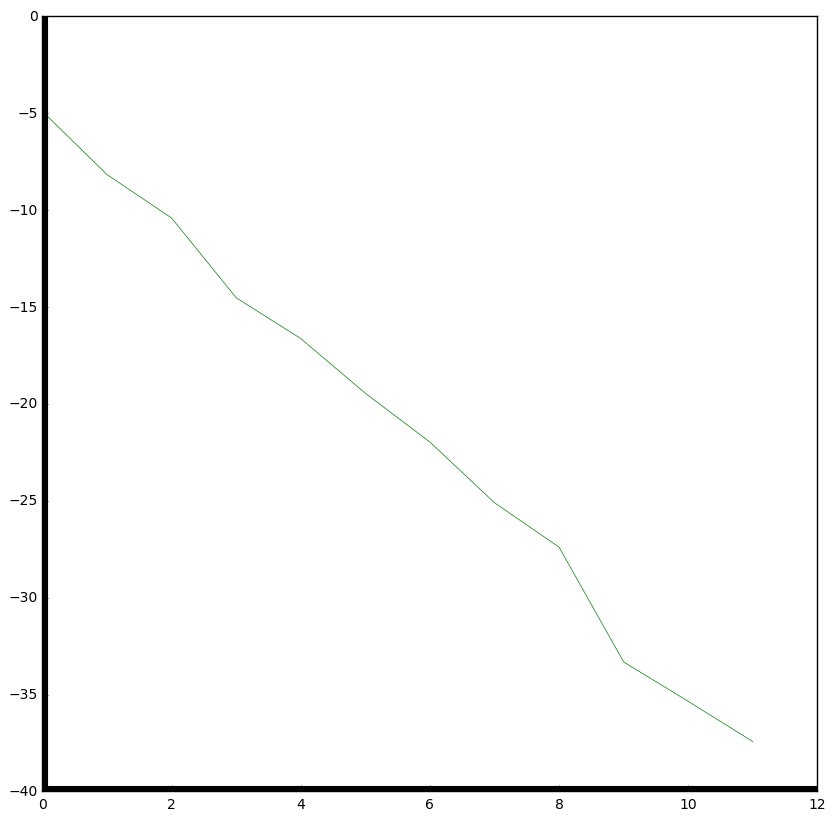

In [20]:
for uv_sequence in uv_sequences:
    print('E value is %s' % uv_sequence[1])
    vn = list(filter(lambda x: x != 0, uv_sequence[0][1]))

    plt.plot(
        range(len(vn)), [np.log(np.abs(our_object)) for our_object in vn],
        color="green", linewidth=(0.5))
    ax1 = plt.axes()
    ax1.get_xaxis().tick_bottom()
    ax1.get_yaxis().tick_left()
    xmin, xmax = ax1.get_xaxis().get_view_interval()
    ymin, ymax = ax1.get_yaxis().get_view_interval()
    ax1.add_artist(
        plt.Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=8))
    ax1.add_artist(
        plt.Line2D((xmin, xmin), (ymin, ymax), color='black', linewidth=8))
    plt.show()

## v_n(n), u_n(n)

E value is 0.03


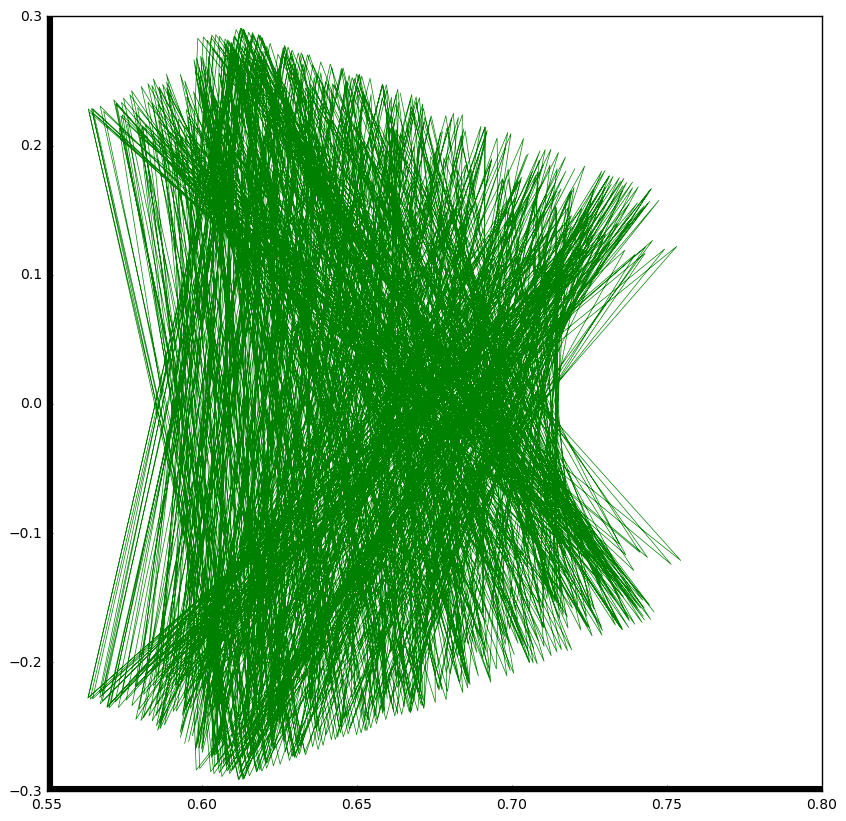

E value is 0.08


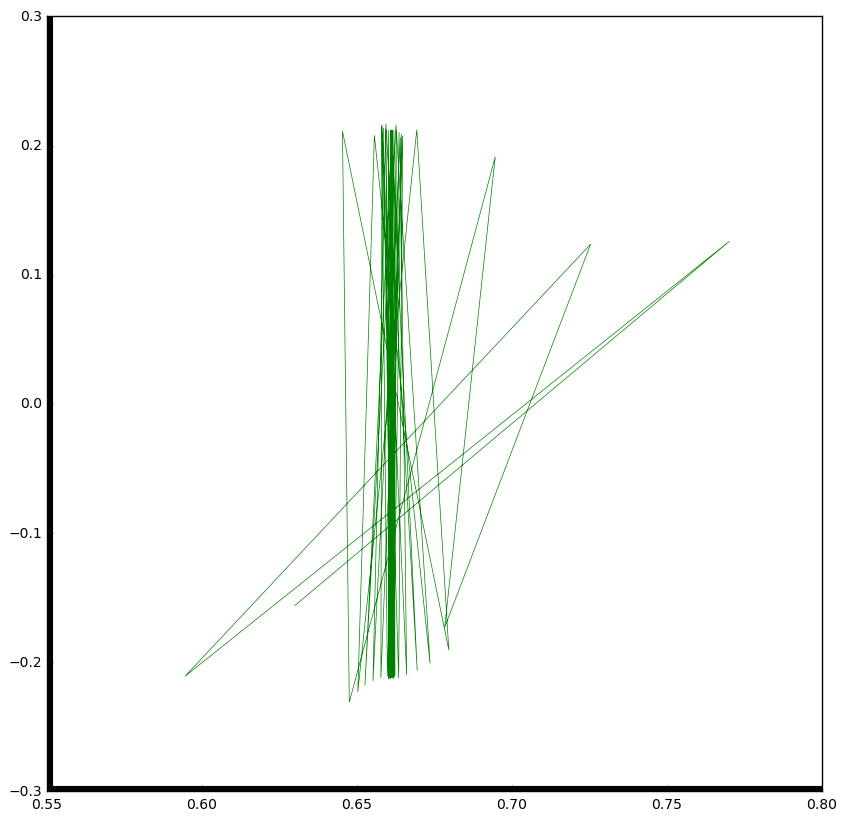

E value is 0.13


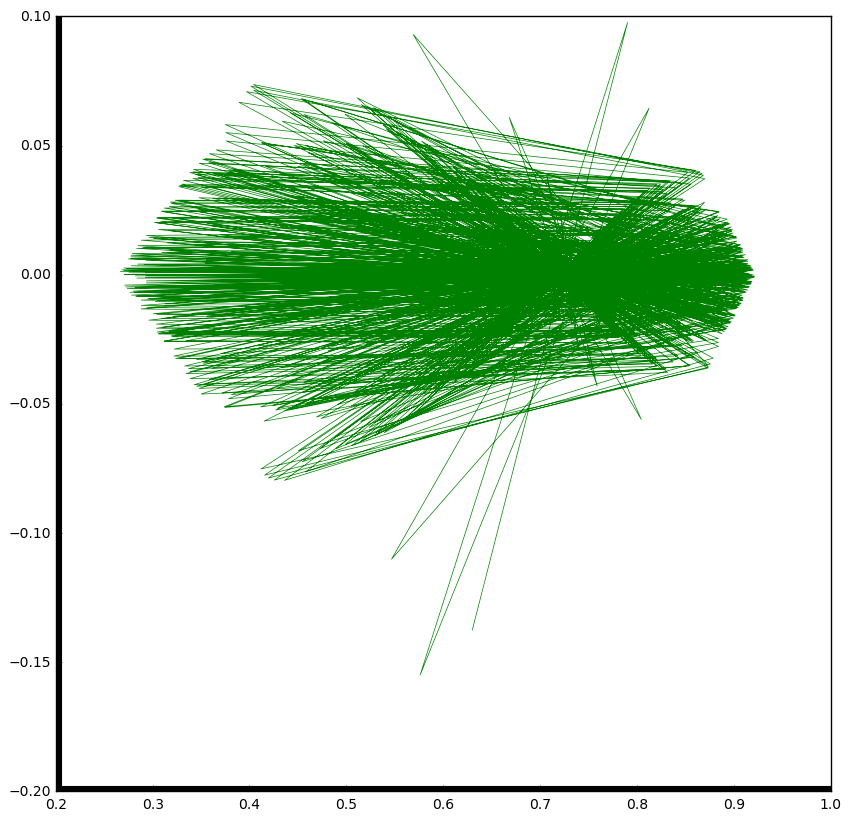

E value is 0.18


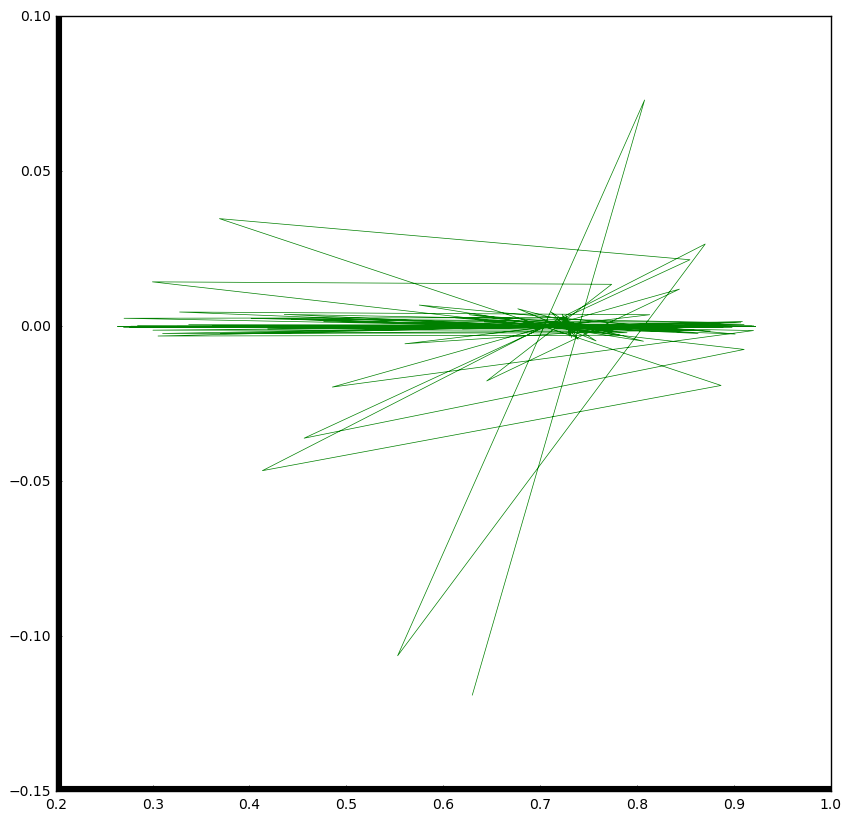

E value is 0.23


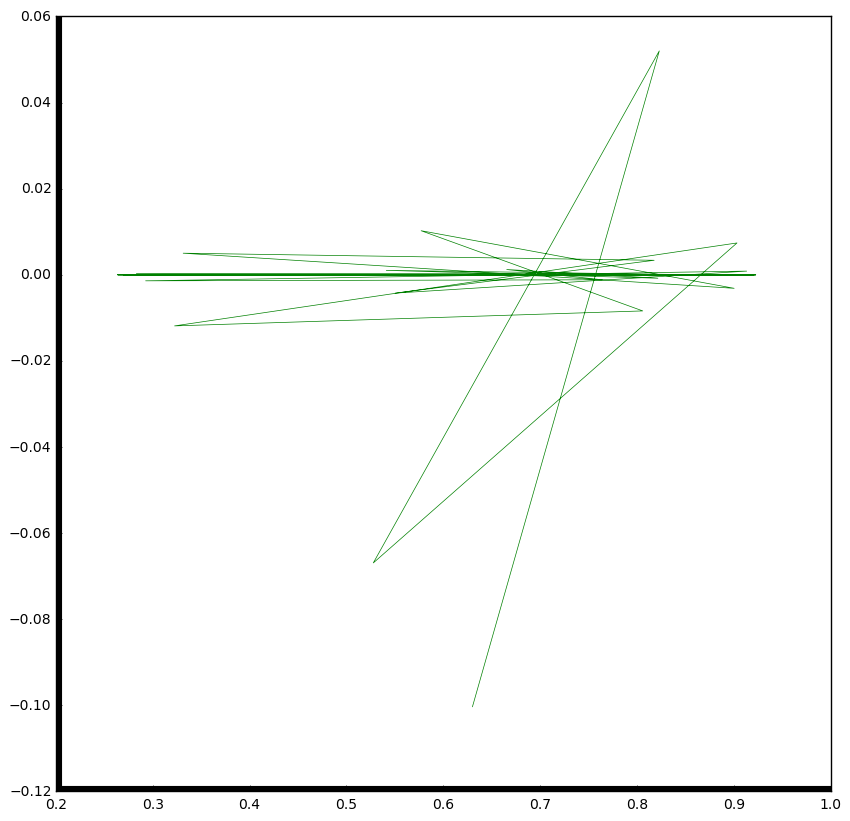

E value is 0.28


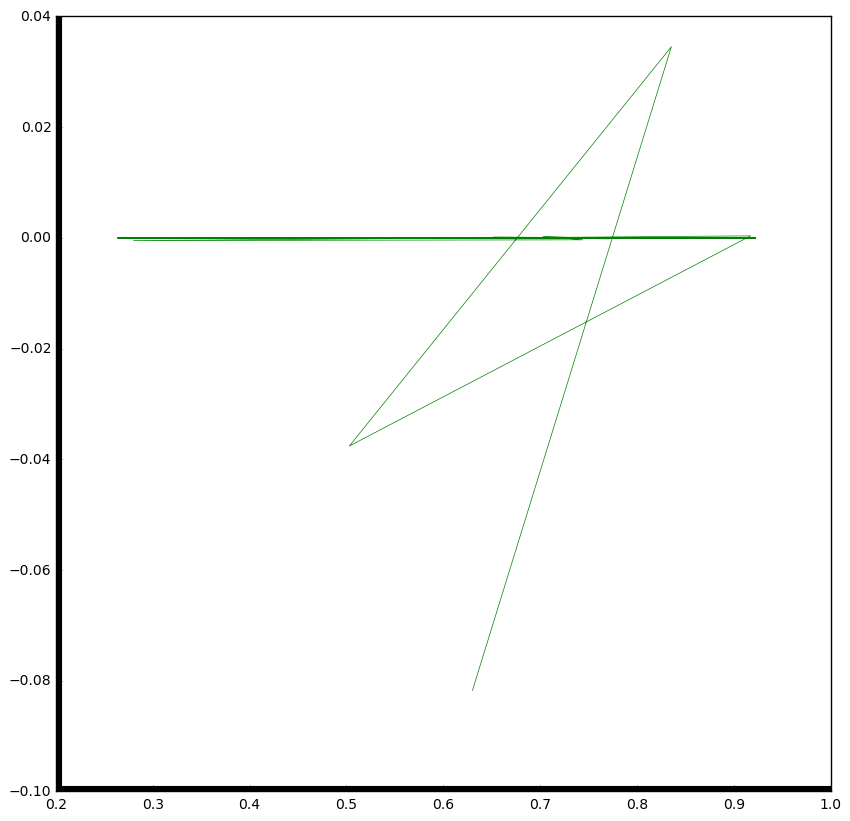

E value is 0.33


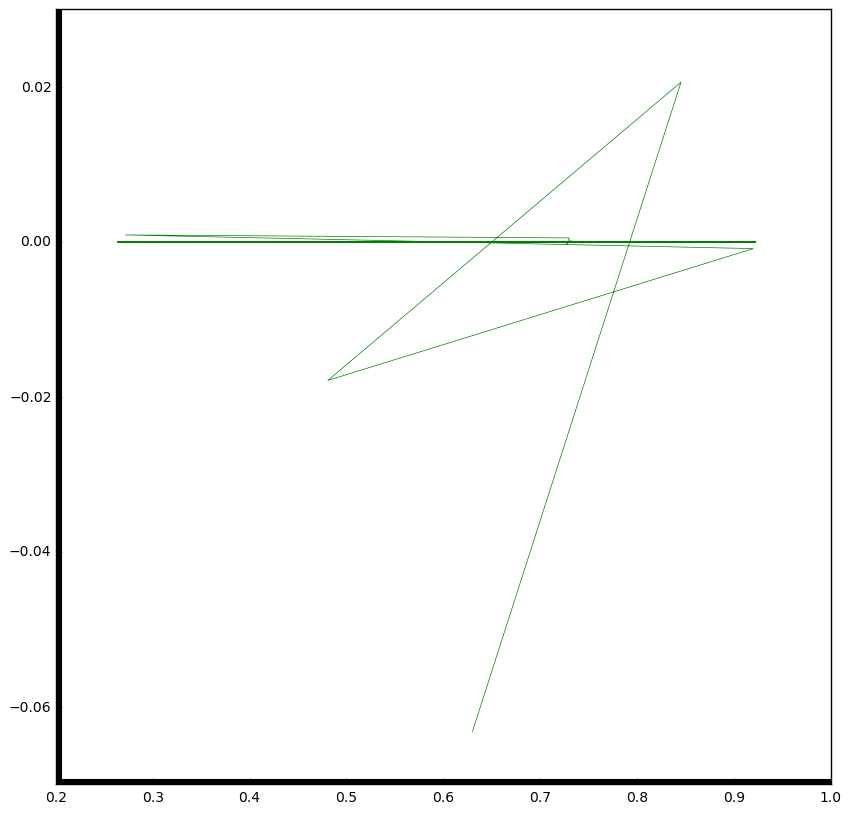

E value is 0.38


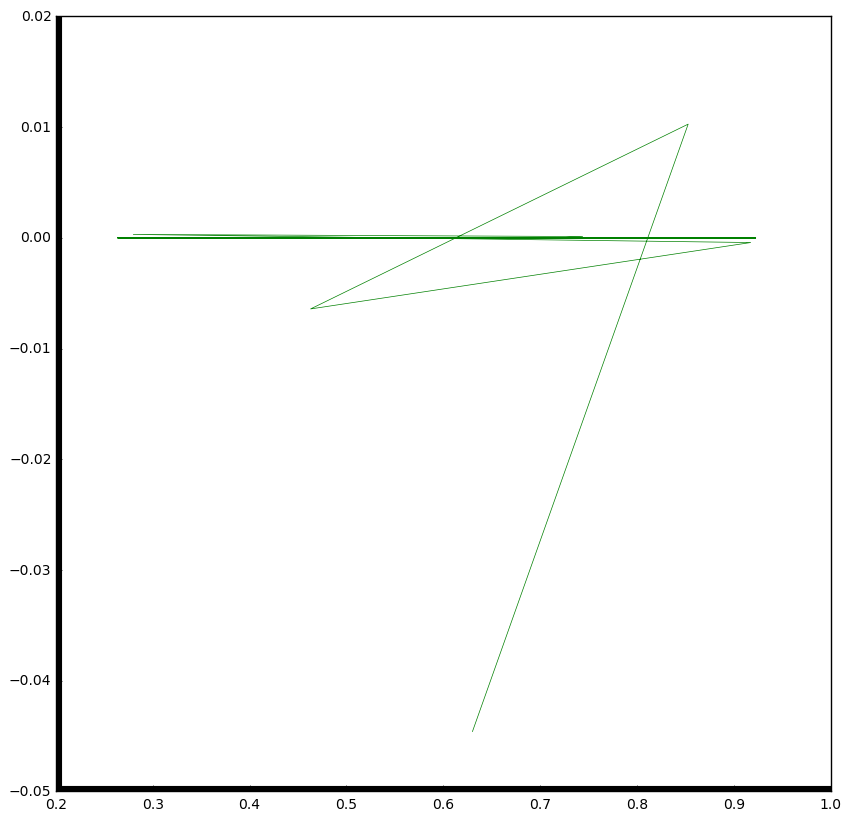

E value is 0.43


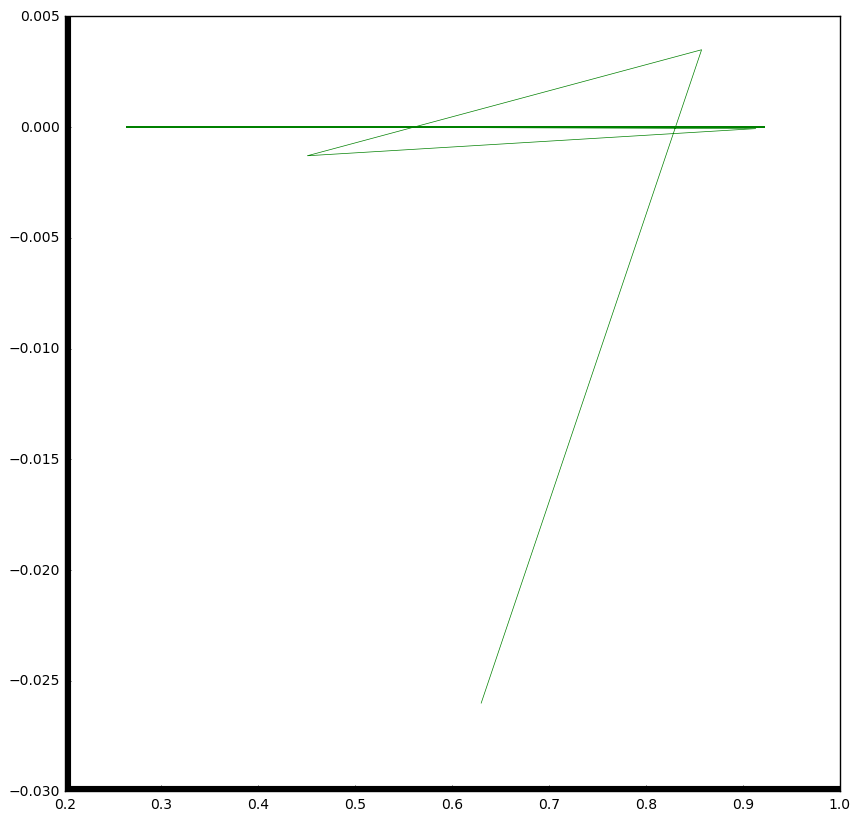

E value is 0.48


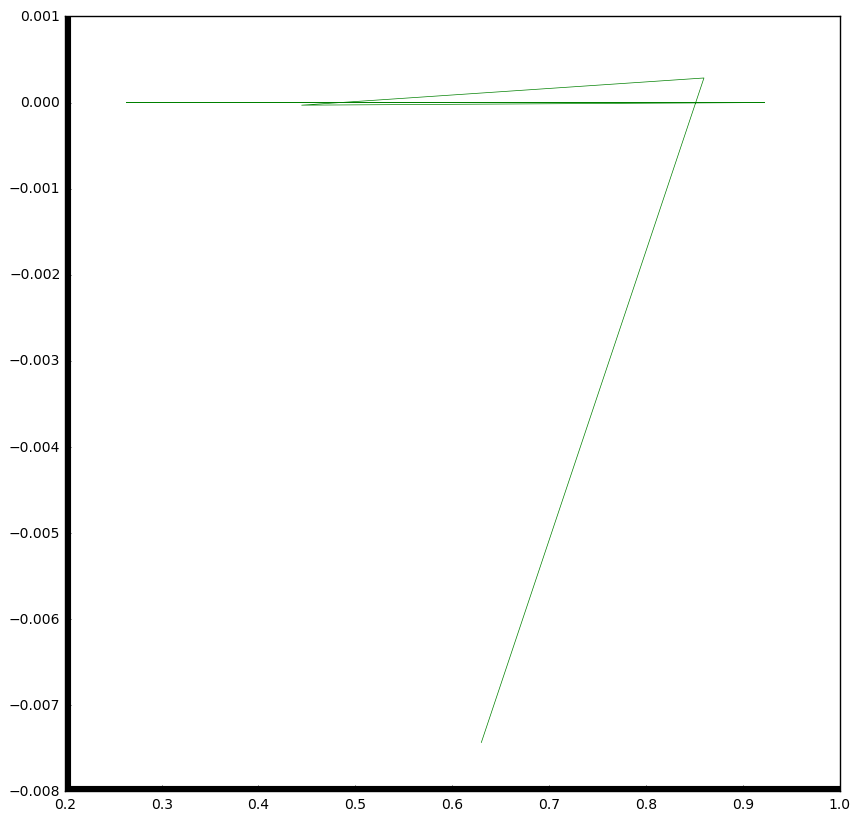

In [21]:
for uv_sequence in uv_sequences:
    print('E value is %s' % uv_sequence[1])
    plt.plot(
        uv_sequence[0][0], uv_sequence[0][1], color="green", linewidth=(0.5))
    ax1 = plt.axes()
    ax1.get_xaxis().tick_bottom()
    ax1.get_yaxis().tick_left()
    xmin, xmax = ax1.get_xaxis().get_view_interval()
    ymin, ymax = ax1.get_yaxis().get_view_interval()
    ax1.add_artist(
        plt.Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=8))
    ax1.add_artist(
        plt.Line2D((xmin, xmin), (ymin, ymax), color='black', linewidth=8))
    plt.show()

## (x_n, y_n)

E value is 0.03


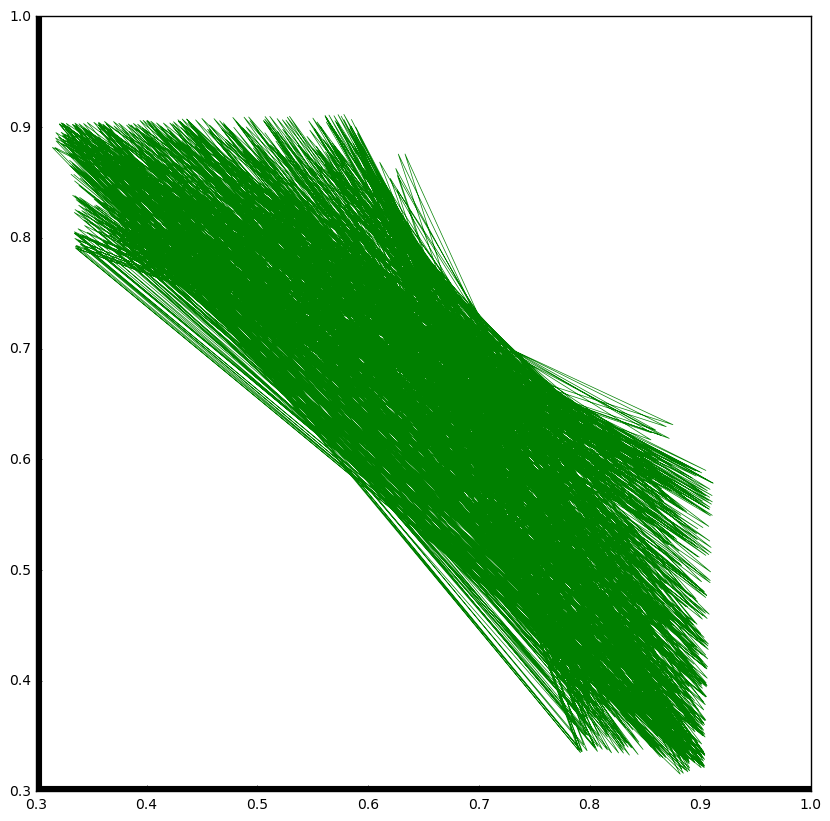

E value is 0.08


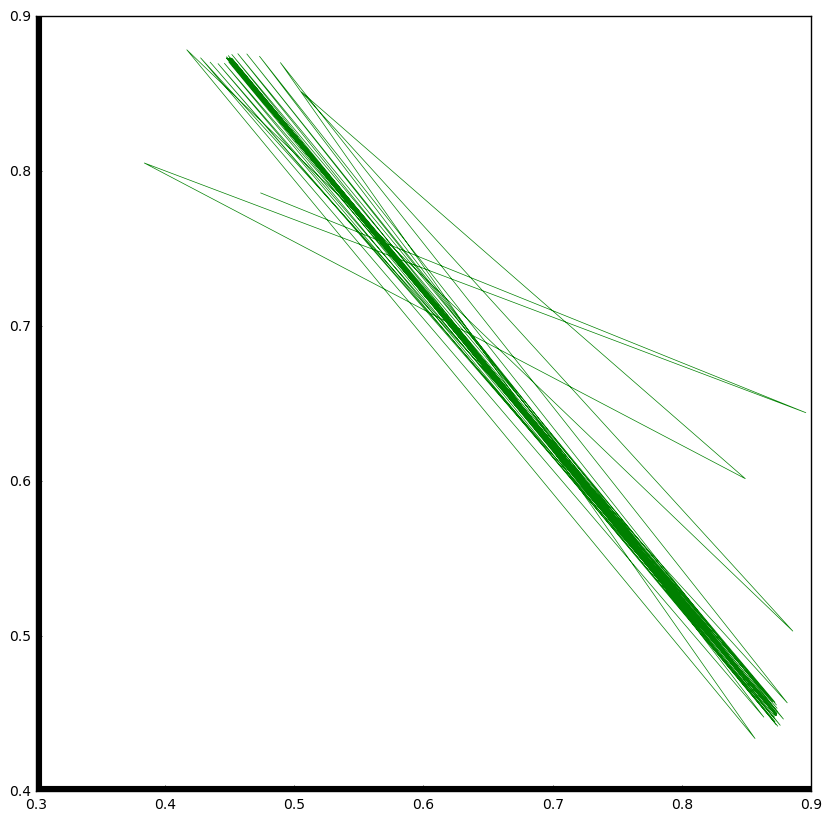

E value is 0.13


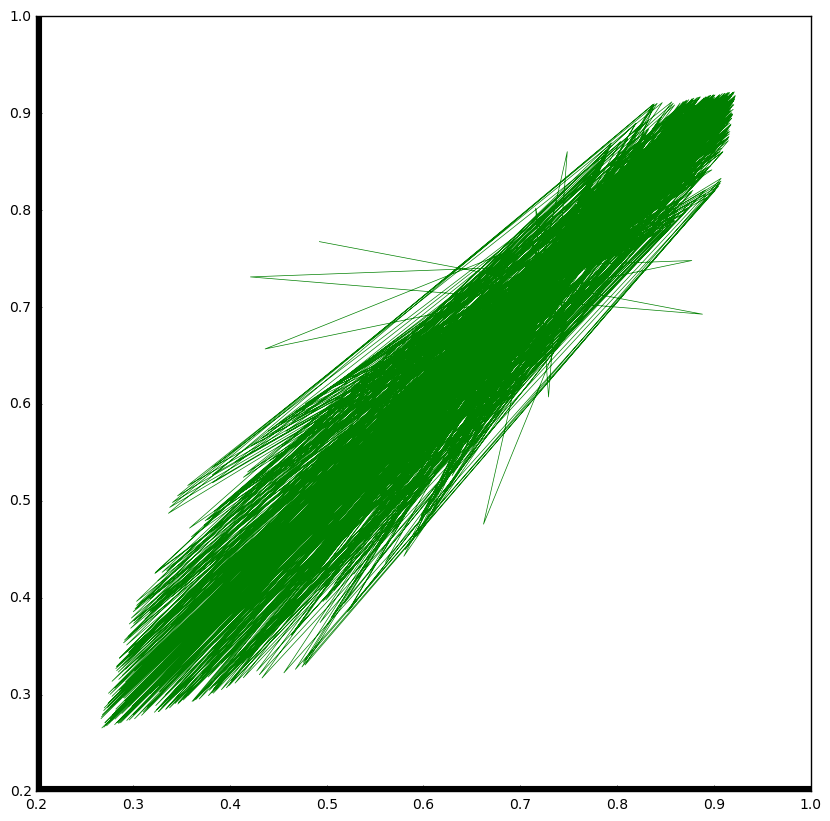

E value is 0.18


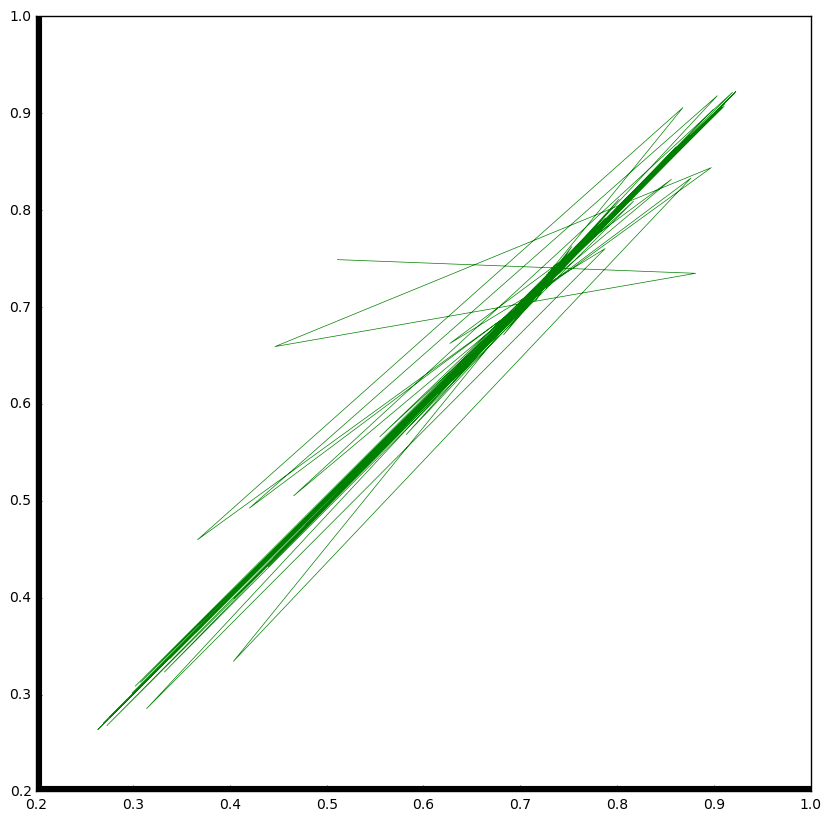

E value is 0.23


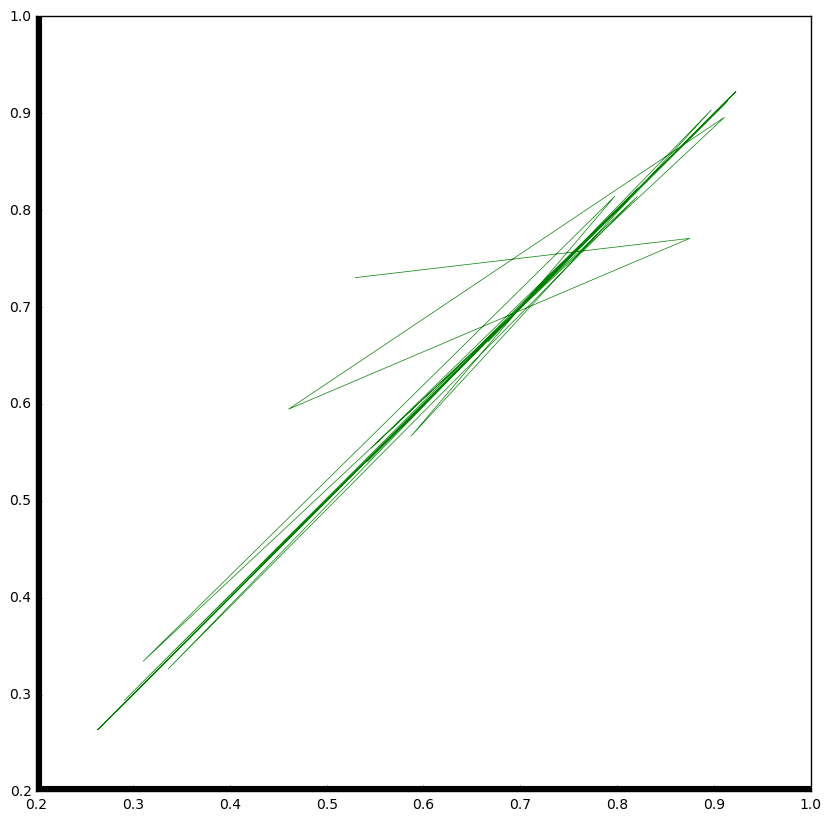

E value is 0.28


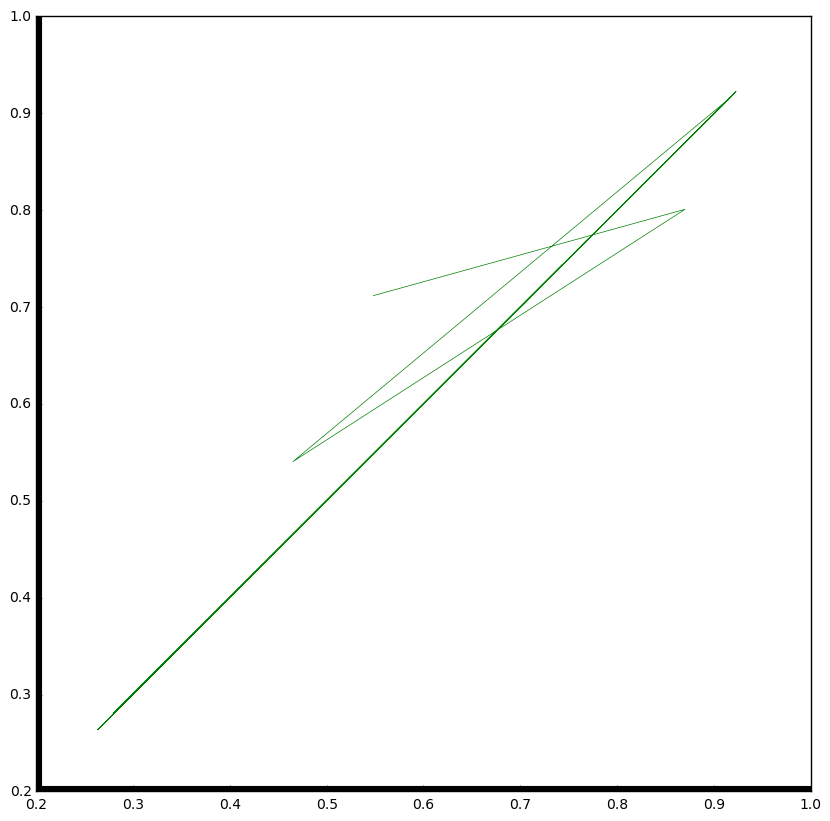

E value is 0.33


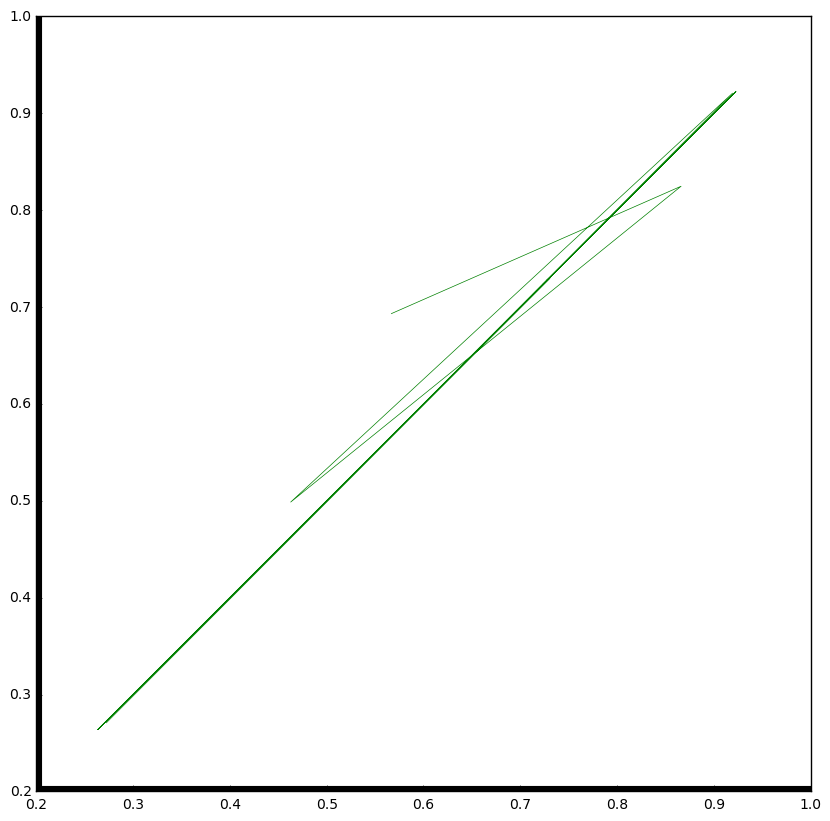

E value is 0.38


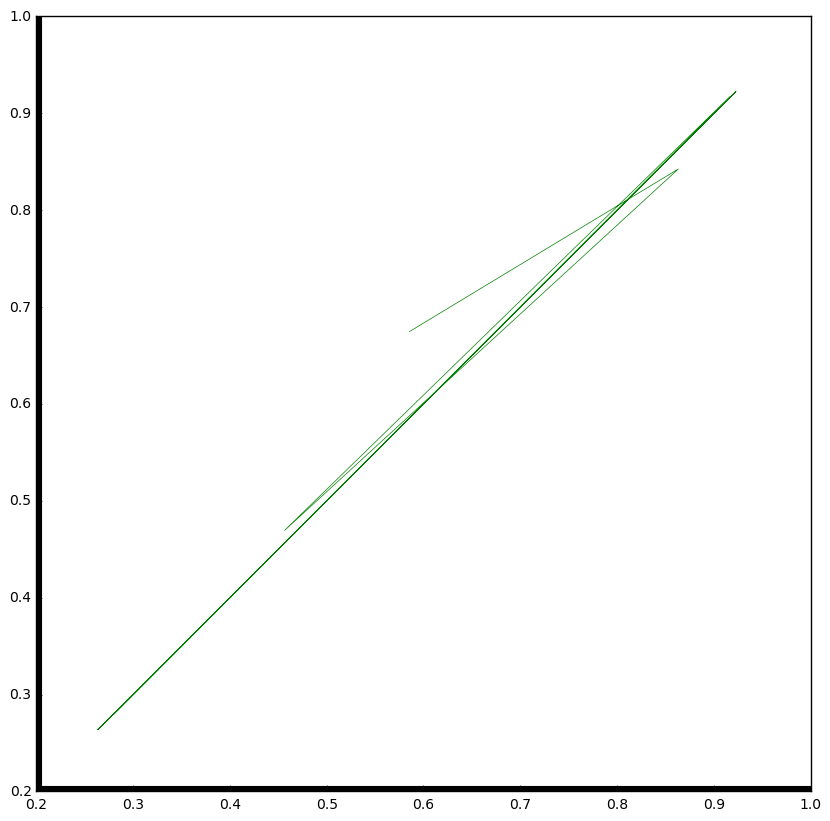

E value is 0.43


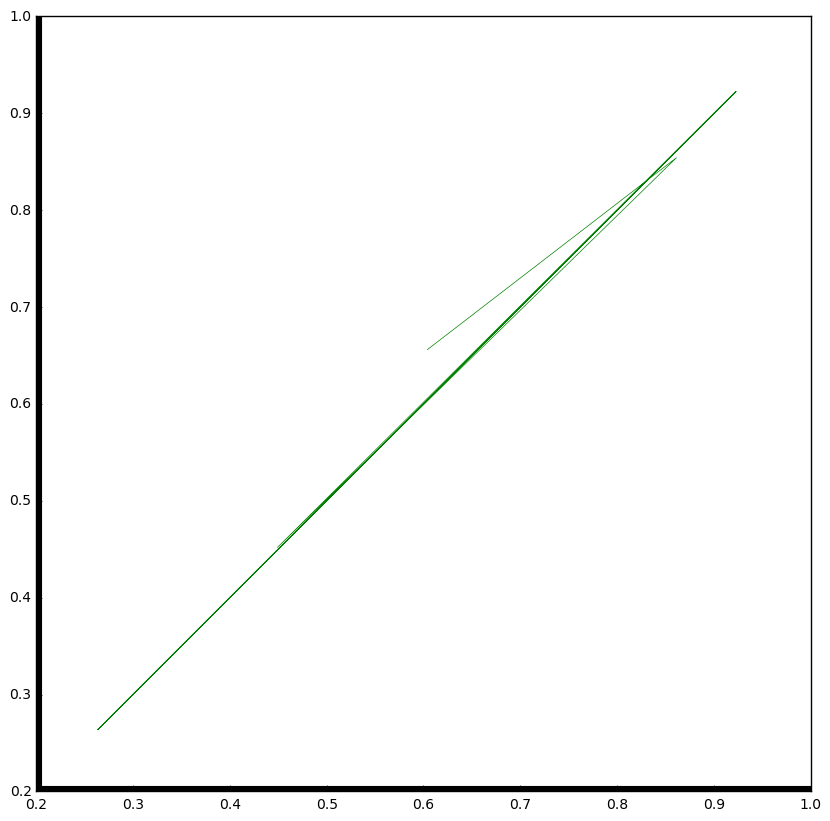

E value is 0.48


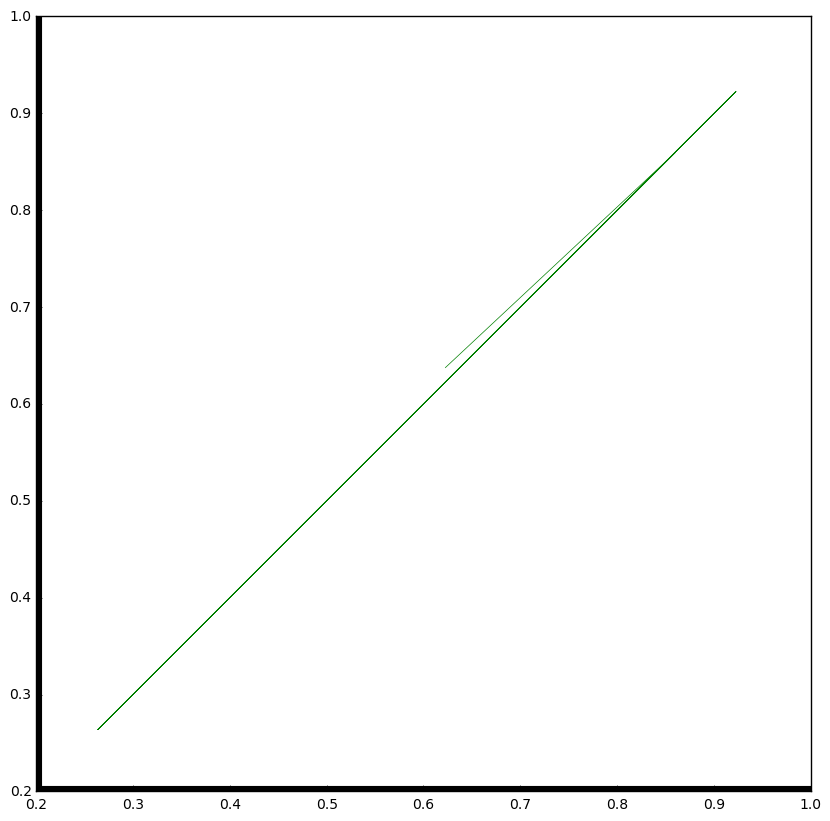

In [22]:
for xy_sequence in xy_sequences:
    print('E value is %s' % xy_sequence[1])
    plt.plot(
        xy_sequence[0][0], xy_sequence[0][1], color="green", linewidth=(0.5))
    ax1 = plt.axes()
    ax1.get_xaxis().tick_bottom()
    ax1.get_yaxis().tick_left()
    xmin, xmax = ax1.get_xaxis().get_view_interval()
    ymin, ymax = ax1.get_yaxis().get_view_interval()
    ax1.add_artist(
        plt.Line2D((xmin, xmax), (ymin, ymin), color='black', linewidth=8))
    ax1.add_artist(
        plt.Line2D((xmin, xmin), (ymin, ymax), color='black', linewidth=8))
    plt.show()